


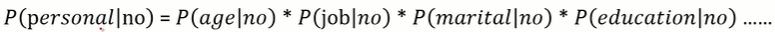

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve
import matplotlib.pyplot as plt

In [2]:
#读取数据集并清洗
def process_data():
    data = pd.read_csv('bank-full.csv', delimiter=';')
    #数据清洗，删除空值
    data = data.dropna()
    #获取keys
    keys = data.keys()
    keys.drop(["day","month","pdays"])
    #将文本数据换为数字类别 , apply方法依次遍历data[keys]里面的列,并进行数字转换
    data = data[keys].apply(LabelEncoder().fit_transform) #LabelEncoder主要是将每一列的数据进行分类，例如分为5类，依次换为0-4，用数字代替
    x_train = data.iloc[:,:-1]
    y_train = data.iloc[:,-1]
    x_test = data.iloc[40000:,:-1]
    y_test = data.iloc[40000:,-1]
    return x_train,x_test,y_train,y_test

In [5]:
#计算正负样本的所有概率（条件概率）
def cal_p(train_x,train_y):
    all_dict = {"yes":{},"no":{}}
    data_yes = train_x.loc[train_y==1]#获取所有正样本数据
    data_no = train_x.loc[train_y==0]#获取所有负样本数据
    all_dict["yes"]["p"] = len(data_yes/len(train_x))#获取正样本概率
    all_dict["no"]["p"] = len(data_no/len(train_x))#获取负样本概率
    for key in data_yes.keys():
        #计算正样本的条件概率,例如在yes这一类中，job一共有三类xyz，分别计算xyz在所有yes分类job属性中的比例
        all_dict["yes"][key] = data_yes.groupby(by = key).size()/len(data_yes)
        #计算负样本的条件概率
        all_dict["no"][key] = data_no.groupby(by = key).size()/len(data_no)
    return all_dict

In [6]:
#测试数据
def bayes_test(test_x,all_dict):
    keys = test_x.keys()
    pred_y = []
    #计算条件概率的值
    for i in range(test_x.shape[0]):
        p_yes = 1
        p_no = 1
        for j in range(test_x.shape[1]):
            if test_x.iloc[i,j] not in all_dict["yes"][keys[j]]: #说明在正样本集合中没有该属性，这样的话概率为0
                p_yes = 0
            else:
                p_yes *= all_dict["yes"][keys[j]][test_x.iloc[i,j]]
            if test_x.iloc[i,j] not in all_dict["no"][keys[j]]: #说明在负样本集合中没有该属性，这样的话概率为0
                p_no = 0
            else:
                p_no *= all_dict["no"][keys[j]][test_x.iloc[i,j]]
        p_yes *= all_dict["yes"]["p"]
        p_no *= all_dict["no"]["p"]
        #判断p_yes和p_no的大小
        if p_yes >= p_no:
            pred_y.append(1)
        else:
            pred_y.append(0)
    return pred_y     

In [8]:
#评价指标
def score(y_test,y_predict):
    print("准确率:",accuracy_score(y_predict,y_test))
    print("精确率:",precision_score(y_predict,y_test))
    print("召回率:",recall_score(y_predict,y_test))
    #ROC曲线
    fpr,tpr,thresholds = roc_curve(y_test,y_predict)
    fig = plt.figure(figsize = (10,6))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(fpr,tpr,color="red")
    plt.show()

准确率: 0.7486087123392823
精确率: 0.8219807772670288
召回率: 0.6899333567169414


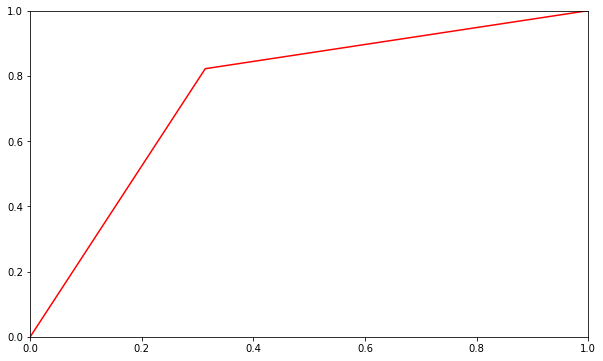

In [9]:
if __name__ == "__main__":
    #读取数据并处理数据
    x_train,x_test,y_train,y_test = process_data()
    all_dict = cal_p(x_train,y_train)
    pred_y = bayes_test(x_test,all_dict)
    score(y_test,pred_y)

In [11]:
test = pd.read_csv('bank-full.csv', delimiter=';')
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
